# 画像メディア工学３回目
## 3. トーンカーブを利用した画像の変換
### ライブラリの読み込み（おまじない）

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Google colaboratoryで利用する場合の画像のアップロード
Google colaboratoryでは，時間がたつと実行環境がリセットされるため，
その時には，画像ファイルのアップロードが必要．

In [2]:
from google.colab import files
uploaded_file = files.upload()

### 3.1 Pythonの配列の要素へのアクセス（スライス）
以下で利用する，Pythonでの配列の要素へのアクセスについて，簡単に紹介しておく．

Pythonでは，配列の一部分へのアクセスが容易にできる．

In [3]:
arr = "ABCDEFGHIJ"
print(arr[1])     # 1番目の要素
print(arr[0:3])   # 0番目～3未満(=2番目)まで
print(arr[:3])    # 先頭～2番目まで
print(arr[3:])    # 3番目～最後まで
print(arr[-2:])   # 最後から２番目～最後まで
print(arr[1:6:2]) # 1番目～5番目まで2つごと

B
ABC
ABC
DEFGHIJ
IJ
BDF


numpyの配列でも同じようにアクセスできる．

In [4]:
num = np.array([9,8,7,6,5,4,3,2,1,0])
print(num[1])
print(num[0:3])
print(num[:3])
print(num[3:])
print(num[-2:])
print(num[1:6:2])

8
[9 8 7]
[9 8 7]
[6 5 4 3 2 1 0]
[1 0]
[8 6 4]


スライスを利用して，配列の一部のみへの代入もできる

In [5]:
num = np.array([9,8,7,6,5,4,3,2,1,0])
num[1:6:2]=0
print(num)

[9 0 7 0 5 0 3 2 1 0]


配列の添え字として，配列を利用できて，
$2\times3$の配列を配列の添え字とすると，結果も$2\times3$の配列になる．

In [6]:
idx = np.array([[0,1,2],
                [5,4,3]])
print( num[idx] )

[[9 0 7]
 [0 5 0]]


### 3.2 ガンマ変換

### 画像の読み込み

In [7]:
img = cv2.imread('img01.png', 0);  # モノクロ画像として読み込み
#plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)

### トーンカーブ用の配列準備

In [8]:
in_val = np.array(range(256)) # 0～256未満(=255_)までの配列
#print(in_val)

### ガンマ変換のトーンカーブの作成とトーンカーブのグラフ描画
int_valは要素数256の配列なので，out_valも要素数256の配列になる．
$$out\_val = 255 * \frac{[0,1,2,...,254,255]}{255}^{\frac{1}{\gamma}}$$

out_val[10]は入力画素値が10の時に，出力画素値がいくらになるかを表す配列．

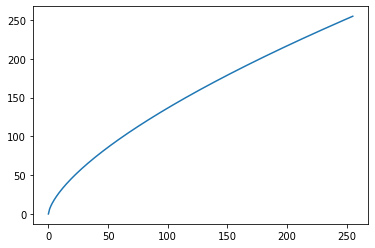

In [9]:
gamma = 1.5
out_val = 255 * (in_val/255)**(1/gamma) # ** はべき乗
#print(out_val)
plt.plot(in_val, out_val)

### ガンマ変換
まず，出力用の画像を作成．サイズは入力画像と同じ．

img.shapeは，画像（配列）の形状を返す

In [10]:
img2 = np.zeros(img.shape)
print(img.shape)

(624, 416)


for文を使って，画素ごとにガンマ変換を計算．

for i in range(5): は，for(i=0; i<5; i++){ と同じ意味．

for文の内部（繰り返し部分）はインデントで表されるため，Pythonではインデントが重要．

In [11]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img2[i,j] = int( 255 * (img[i,j]/255)**(1/gamma) )    

ただし，for文を使って繰り返し計算すると時間がかかる．

3.1節で説明したように，配列の添え字として配列が利用できることを踏まえると，以下のように書ける（こちらの方が高速）

In [12]:
img2 = out_val[img] # 元画像をout_valの添え字として，元画像と同じサイズの配列が出力
img2 = img2.astype(np.uint8) # uint型に変換

### 変換結果を描画

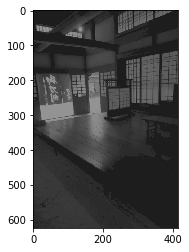

In [13]:
plt.imshow(img2, cmap='gray', vmin = 0, vmax = 255)

### 変換前後のヒストグラムの描画
変換前

(array([85078., 37444., 63230., 21002., 12923., 15366.,  9487.,  3195.,
         2043.,  2360.,  7456.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.]),
 array([  0. ,  10.2,  20.4,  30.6,  40.8,  51. ,  61.2,  71.4,  81.6,
         91.8, 102. , 112.2, 122.4, 132.6, 142.8, 153. , 163.2, 173.4,
        183.6, 193.8, 204. , 214.2, 224.4, 234.6, 244.8, 255. ]),
 <a list of 25 Patch objects>)

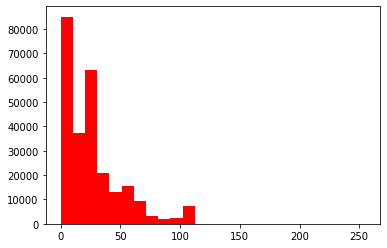

In [14]:
plt.hist(img.ravel(), color='red', bins=25,  range=(0, 255))

変換後　（最後にセミコロンを付けると，余計な出力を抑制できる）

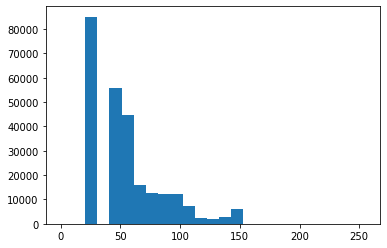

In [15]:
plt.hist(img2.ravel(), bins=25,  range=(0, 255));

### 3.3 折れ線トーンカーブ
トーンカーブを指定する配列out_valの値を折れ線トーンカーブ用に変更すると，折れ線トーンカーブによる変換も可能．

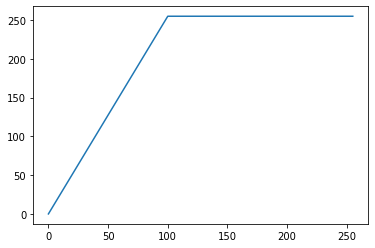

In [16]:
for i in range(256):
    if i<100:
        out_val[i] = np.array(i)/100*255
    else:
        out_val[i] = 255

plt.plot(in_val, out_val)                

スライスを利用してfor文などの繰り返しを使わずにout_valを定義し，
その処理を提出してください．

結果は上のグラフと同じになります．

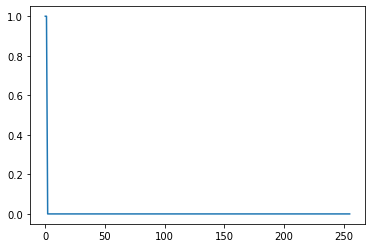

In [20]:
out_val = np.zeros(256)
out_val[0] = 1
out_val[1] = 1
# と書くのではなく、スライスなどを使って効率的に書いてください

# ヒント：
# np.array(range(256))
# で0～255までの配列が作成できることも利用すると良いでしょう

plt.plot(in_val, out_val)                